# Model #1 COVID-Death Rates Simple Linear Regression 


*   Import data>owid_covid_data.csv
*   Taking the first 7 days as x and the 8th day as y.

# Imports


In [1]:
# Libraries
import pathlib
import numpy as np
import pandas as pd
# Graphs
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
from matplotlib import rcParams
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Modeling metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt



# Import Data

In [6]:
# Importing covid_dataset using pandas. 
covid_dataset_data= pd.read_csv('owid_covid_data.csv', na_values = "?", comment='\t', skipinitialspace=True)
covid_dataset = covid_dataset_data.copy()
dataset = covid_dataset.loc[covid_dataset.location=='United States', ['date', 'total_deaths']]
dataset.head()

,date,total_deaths
32403,2019-12-31,0.0
32404,2020-01-01,0.0
32405,2020-01-02,0.0
32406,2020-01-03,0.0
32407,2020-01-04,0.0


#### Plotting

In [7]:
date = dataset['date']
dateFormatting = pd.DataFrame({'new_date': pd.date_range('2019-12-31', '2020-07-31', periods=len(date))})
my_xticks = dateFormatting['new_date'].tolist()


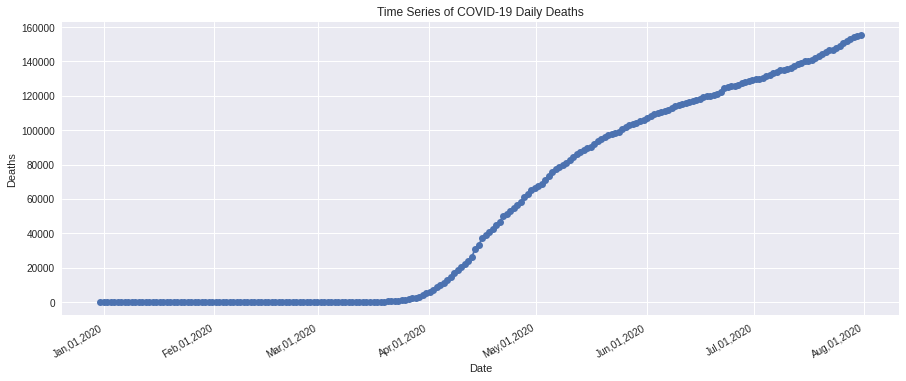

In [9]:
rcParams['figure.figsize'] = 15,6
dates = np.array(dateFormatting['new_date'])
deaths = np.array(dataset['total_deaths'])
plt.plot_date(dates,deaths, linestyle ='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d,%Y')
plt.title('Time Series of COVID-19 Daily Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.gca().xaxis.set_major_formatter(date_format)

# Split train & test set


In [10]:
# Look back leading up to the 7 days before the day we care about
look_back=7
num_samples=len(dataset)-look_back
print('Number of samples: ', num_samples)
# Get indices for new dataset
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(look_back+1).astype(np.int)
# Create the 2D matrix of training samples
data = dataset["total_deaths"].values[indices] 
# Each row represents 7 days in the past
x = data[:,:-1] 
# Each output value represents the 8th day
y = data[:,-1] 

Number of samples:  211


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle = False)

In [12]:
x_train.shape, x_test.shape

((168, 7), (43, 7))

In [13]:
x_test.shape, y_test.shape

((43, 7), (43,))

# Modelling

In [14]:
def get_plot_train (model_pred):
  rcParams['figure.figsize'] = 15,6
  plt.scatter(model_pred, y_train, color="gray", label = 'predicted')
  plt.plot(y_train, y_train, color='red', linewidth=2, label = 'actual')
  plt.xlabel('Y_Pred')
  plt.ylabel('Y_Train')
  plt.legend()

def get_plot_test (model_pred):
  rcParams['figure.figsize'] = 15,6
  plt.scatter(model_pred, y_test, color="gray", label = 'predicted')
  plt.plot(y_test, y_test, color='red', linewidth=2, label = 'actual')
  plt.xlabel('Y_Pred')
  plt.ylabel('Y_Test')
  plt.legend()

# Simple Linear Regression

In [15]:
# Assigning the linear regression model
model=LinearRegression()
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
pred_train_lr= model.predict(x_train)
pred_test_lr= model.predict(x_test)


Text(0.5, 1.0, 'Where Linear Regression Model Train Results Fall on Actual Deaths')

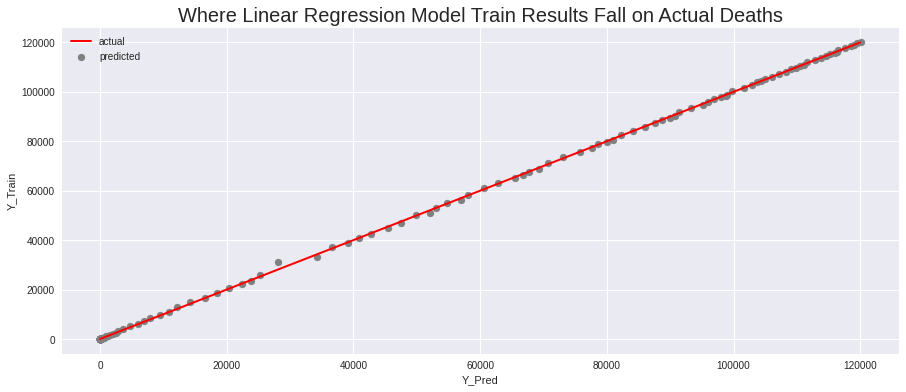

In [17]:
get_plot_train(pred_train_lr)
plt.title('Where Linear Regression Model Train Results Fall on Actual Deaths', size = 20)

Text(0.5, 1.0, 'Where Linear Regression Model Test Results Fall on Actual Deaths')

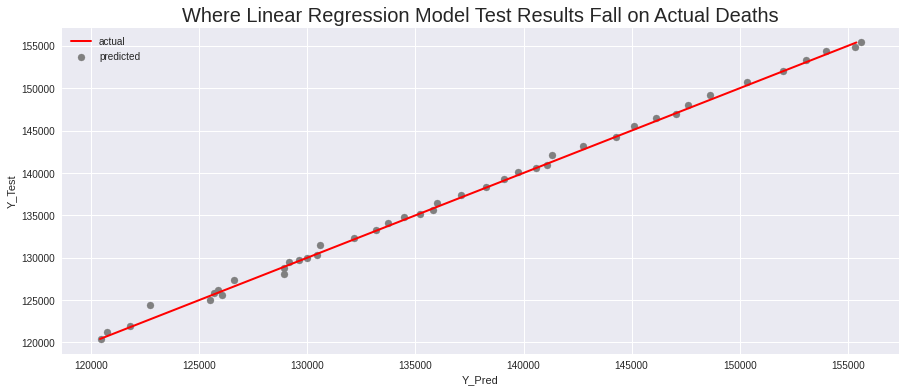

In [18]:
get_plot_test(pred_test_lr)
plt.title('Where Linear Regression Model Test Results Fall on Actual Deaths', size = 20)

# Comparison Actual Versus Predicted

### Performance Metrics

In [19]:
def get_performance_train (model_pred):
  print('Mean Absolute Error:', mean_absolute_error(y_train, model_pred).round(4))  
  print('Mean Squared Error:', mean_squared_error(y_train, model_pred).round(4))
  print('R2_Score:',r2_score(y_train, model_pred)) 
  print('RMSE', np.sqrt(mean_squared_error(y_train,model_pred)))

def get_performance_test (model_pred):
  print('Mean Absolute Error:', mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', mean_squared_error(y_test, model_pred).round(4))  
  print('R2_Score:',r2_score(y_test, model_pred)) 
  print('RMSE', np.sqrt(mean_squared_error(y_test,model_pred))) 

In [20]:
print('Train:')
get_performance_train(pred_train_lr)
print('\nTest:')
get_performance_test(pred_test_lr)

Train:
Mean Absolute Error: 182.2456
Mean Squared Error: 115692.7684
R2_Score: 0.9999413802647064
RMSE 340.1363967227172

Test:
Mean Absolute Error: 346.1153
Mean Squared Error: 215327.5687
R2_Score: 0.9978434340202478
RMSE 464.03401678386575


### Visual Representation

#### Train Actual Versus Predicted

In [21]:
comparison_train = pd.DataFrame({'Actual': y_train, 'Predicted': pred_train_lr})
comparison_train = comparison_train.head(7)
comparison_train.sort_index(inplace=True)
comparison_train

,Actual,Predicted
0,0.0,59.70675
1,0.0,59.70675
2,0.0,59.70675
3,0.0,59.70675
4,0.0,59.70675
5,0.0,59.70675
6,0.0,59.70675


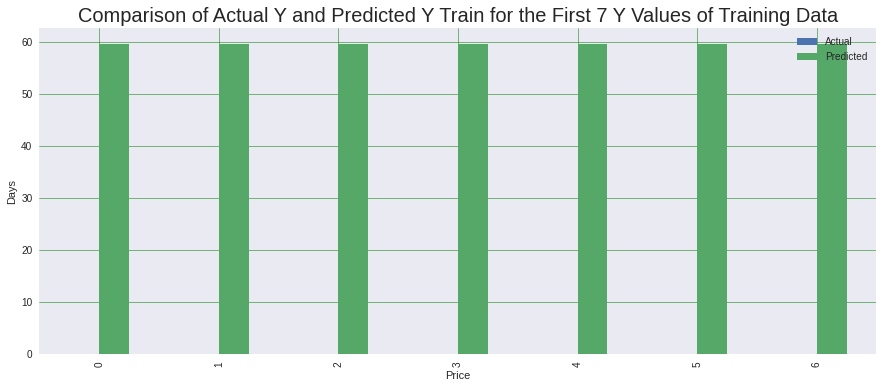

In [22]:
rcParams['figure.figsize'] = 15,6
comparison_train.plot(kind='bar')
plt.title('Comparison of Actual Y and Predicted Y Train for the First 7 Y Values of Training Data', size=20)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Price')
plt.ylabel('Days')
plt.show()

#### Test Actual Versus Predicted

In [23]:
comparison_test = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test_lr})
comparison_test = comparison_test.tail(7)
comparison_test.sort_index(inplace=True)
comparison_test

,Actual,Predicted
36,149256.0,148647.065135
37,150713.0,150317.893614
38,152070.0,152021.949596
39,153314.0,153071.265463
40,154447.0,154017.014184
41,154860.0,155340.028526
42,155403.0,155611.120529


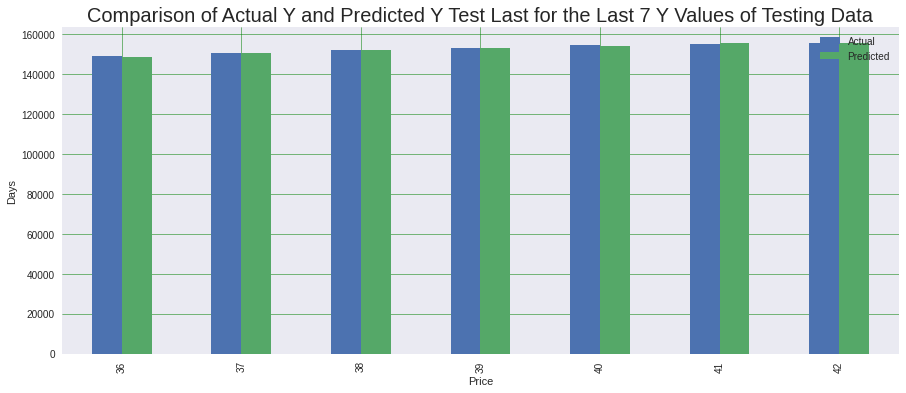

In [24]:
rcParams['figure.figsize'] = 15,6
comparison_test.plot(kind='bar')
plt.title('Comparison of Actual Y and Predicted Y Test Last for the Last 7 Y Values of Testing Data', size=20)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Price')
plt.ylabel('Days')
plt.show()

# Simple Linear Regression Formula

In [25]:
slope = model.coef_[6]
intercept = model.intercept_
print("formula: y = {0} + {1}x".format(intercept,slope))

formula: y = 59.70675006838428 + 1.3122482834560634x
